# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Data yang digunakan dalam projek ini adalah Dataset Restoran Swiggy.
Dataset Restoran Swiggy adalah kumpulan data komprehensif terkait restoran yang tersedia pada platform pengiriman makanan Swiggy.

1. **Sumber Dataset**:
    Dataset ini saya ambil dari website *Kaggle*, berikut linknya:<br>
    https://www.kaggle.com/datasets/abhijitdahatonde/swiggy-restuarant-dataset
2. **Informasi mengenai Dataset**:
   - **Tanpa Label**  : Iya, dataset yang saya gunakan belum memiliki label atau kelas.
   - **Jumlah Baris** : Dataset terdiri dari 8680 baris
   - **Jumlah Kolom** : Dataset terdiri dari 10 kolom
   - **Tipe Data**    : Dataset memiliki data **Kategorikal** dan **Numerik**.
        - *Kategorikal* : *Area*, *City*, *Restaurant*, *Food type* dan *Address*.
        - *Numerik*     : *ID*, *Price*, *Avg ratings*, *Total ratings*, dan *Delivery time*.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [134]:
# load data
df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Clustering-Food-Delivery-Order-History-Data/main/swiggy.csv")
print(df.head())

    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [135]:
print("Jumlah Baris dan Kolom:", df.shape)
print("\nInformasi Dataset:")
print(df.info())

Jumlah Baris dan Kolom: (8680, 10)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB
None


## 2. Melihat data yang hilang

In [136]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
display(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

,Missing Values,Percentage
ID,0,0.0
Area,0,0.0
City,0,0.0
Restaurant,0,0.0
Price,0,0.0
Avg ratings,0,0.0
Total ratings,0,0.0
Food type,0,0.0
Address,0,0.0
Delivery time,0,0.0


## 3. Analisis Distribusi dan Korelasi

In [137]:
# Statistik deskriptif
display(df.describe())

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


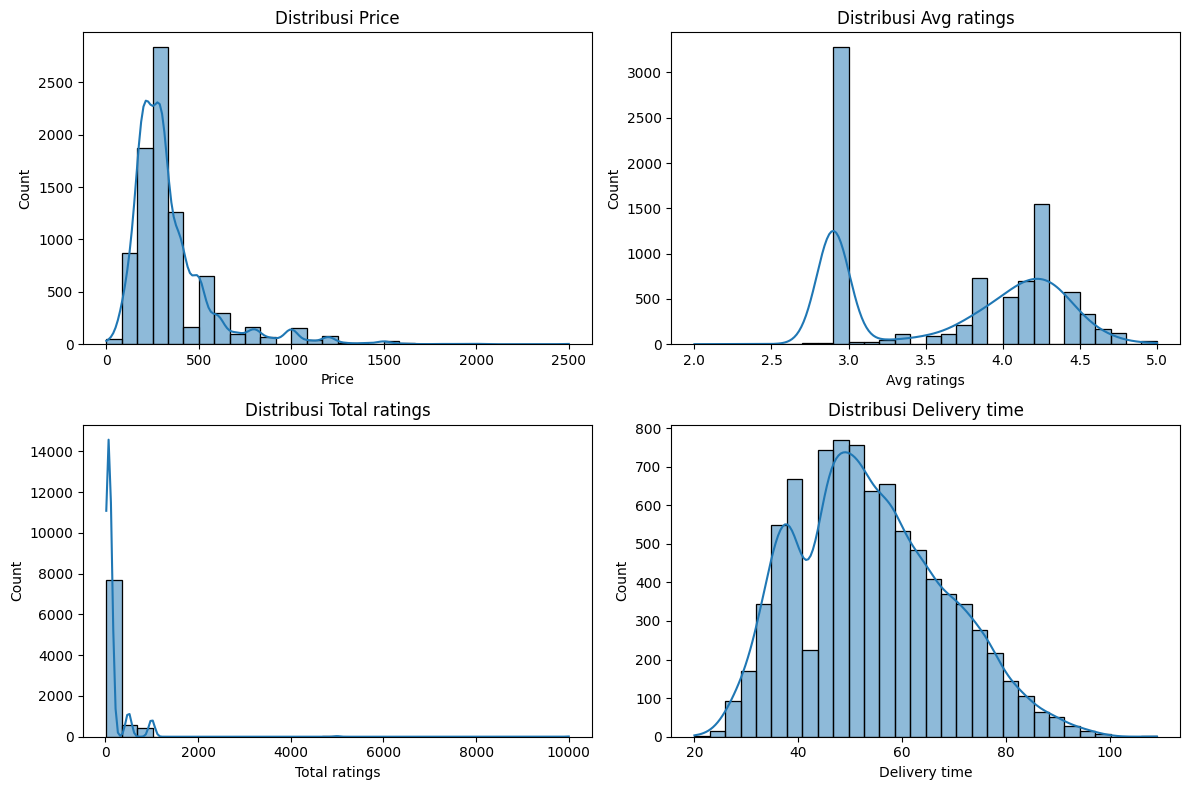

In [138]:
# Visualisasi Kolom Numerik
numerical_columns = ["Price", "Avg ratings", "Total ratings", "Delivery time"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

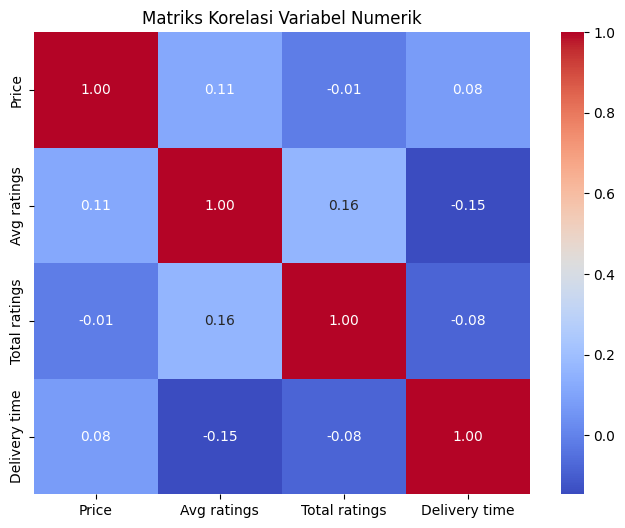

In [139]:
# Matriks Korelasi untuk variabel numerik
numerical_columns = ["Price", "Avg ratings", "Total ratings", "Delivery time"]
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

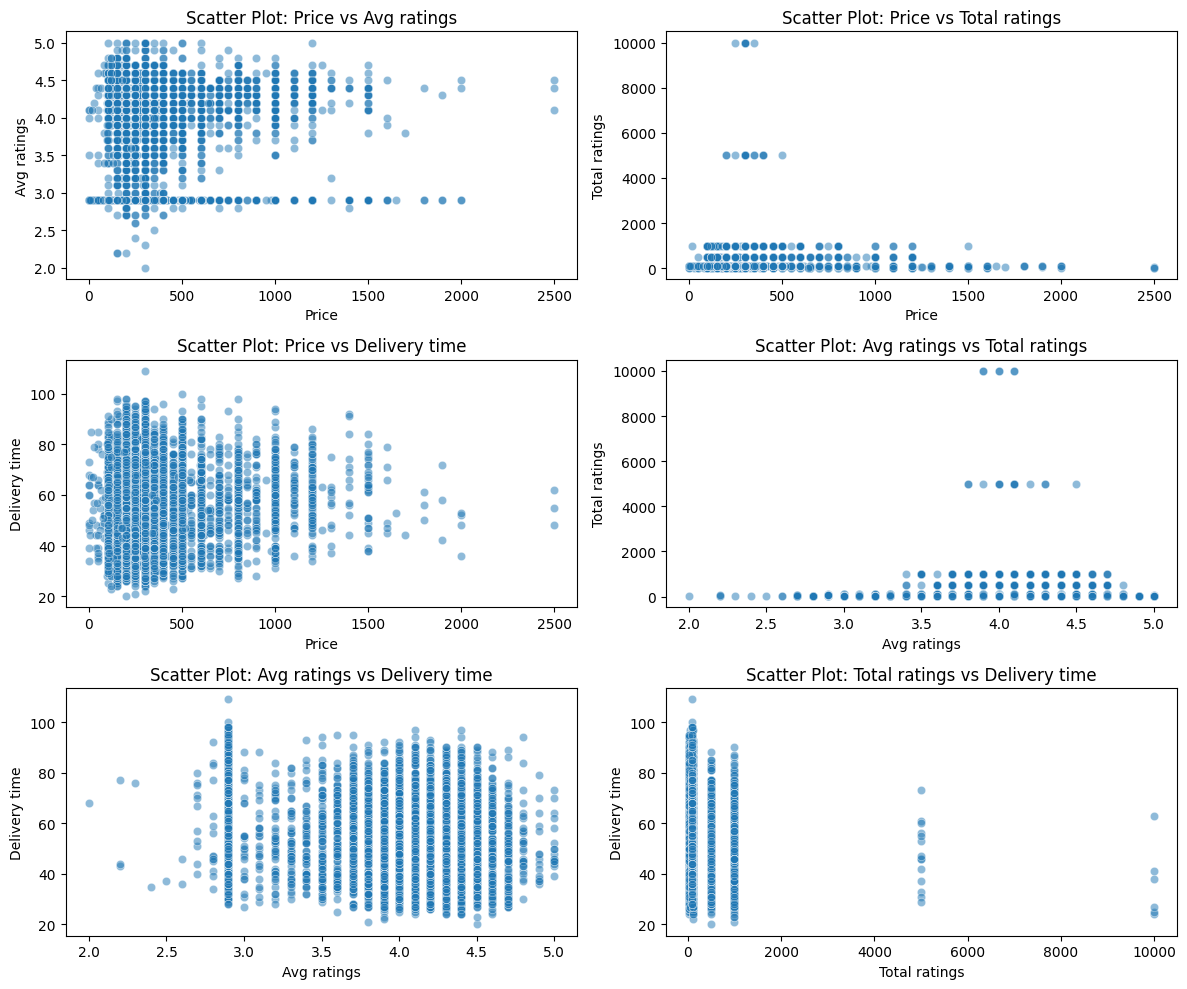

In [140]:
# Membuat pasangan scatter plot untuk semua kombinasi variabel numerik
plt.figure(figsize=(12, 10))
for i, (col1, col2) in enumerate(itertools.combinations(numerical_columns, 2), 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.5)
    plt.title(f"Scatter Plot: {col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()

## 4. Visualisasi Data

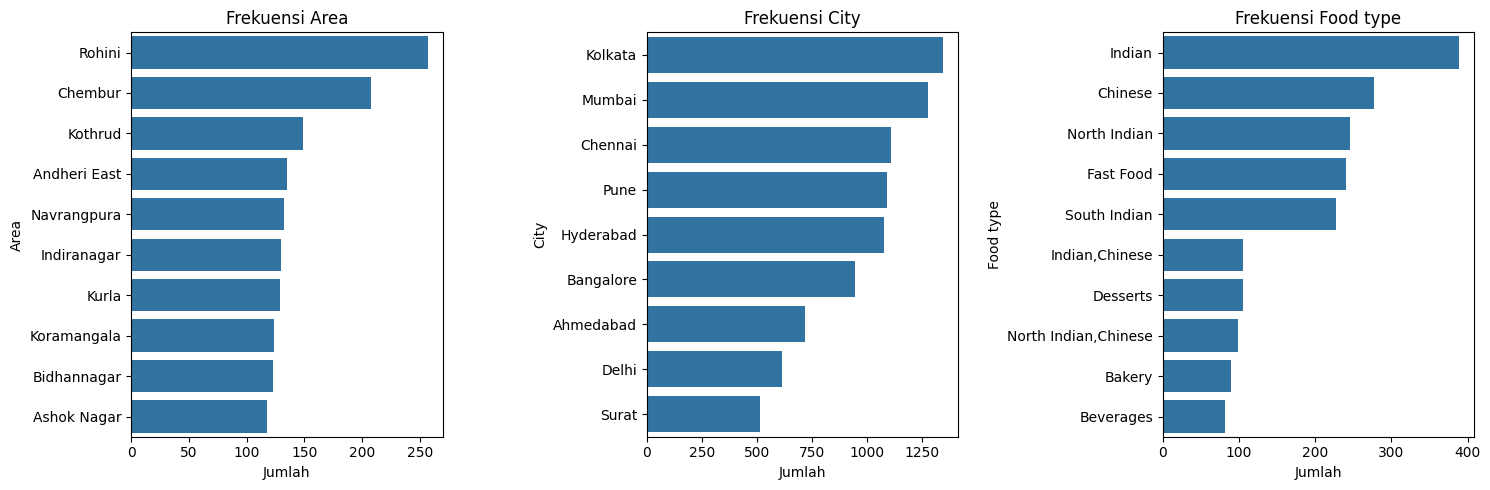

In [141]:
categorical_columns_vis = ["Area", "City", "Food type", "Restaurant"]

plt.figure(figsize=(15, 5))

# Loop untuk memvisualisasikan Area, City, dan Food type dengan countplot
for i, col in enumerate(categorical_columns_vis[:-1], 1):  # Tanpa "Restaurant" dulu
    plt.subplot(1, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 kategori
    plt.title(f'Frekuensi {col}')
    plt.xlabel("Jumlah")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<ipython-input-142-322a91621b05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")


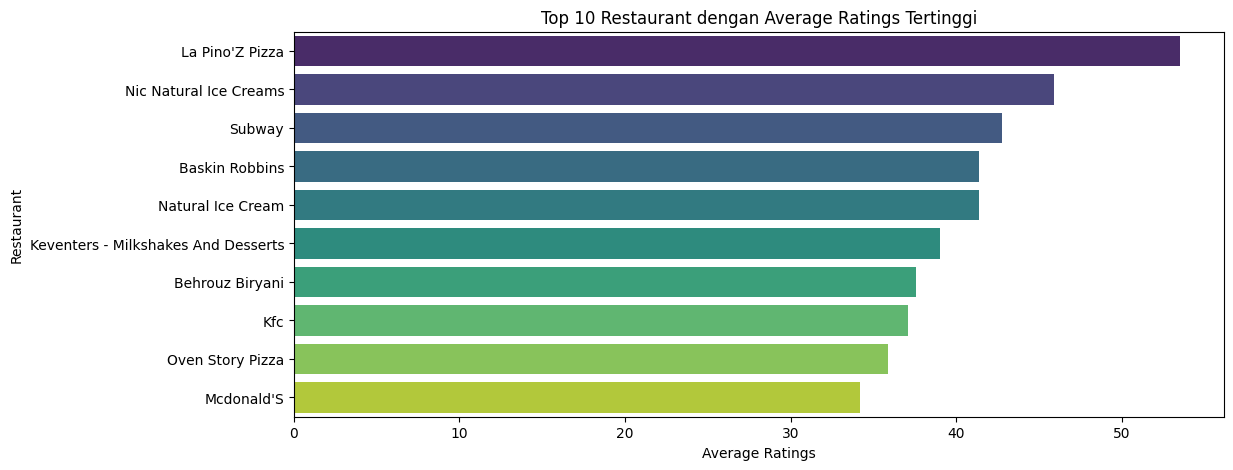

In [142]:
# Visualisasi khusus untuk Restaurant: Top 10 berdasarkan Average Ratings
top_restaurants = df.groupby("Restaurant")["Avg ratings"].sum().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")
plt.title("Top 10 Restaurant dengan Average Ratings Tertinggi")
plt.xlabel("Average Ratings")
plt.ylabel("Restaurant")
plt.show()

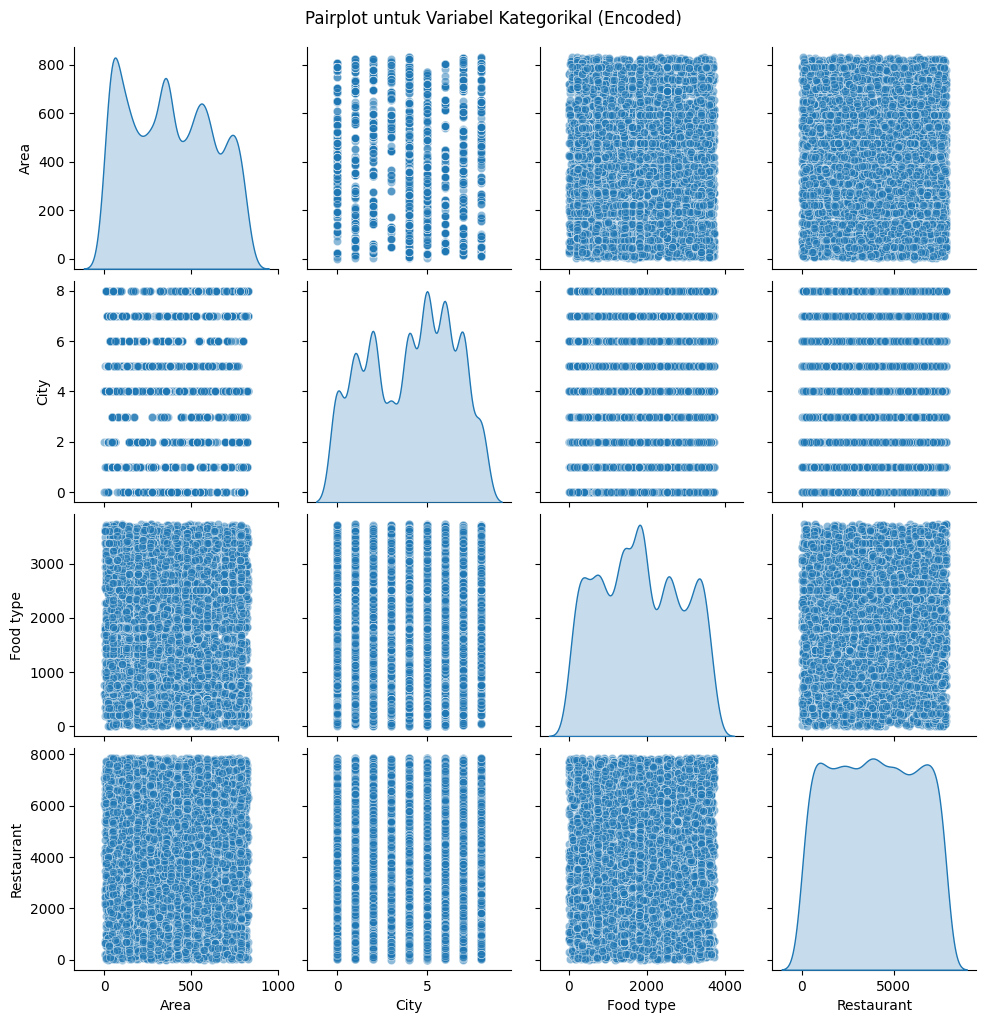

In [143]:
# Label Encoding untuk beberapa kolom kategorikal
df_encoded = df.copy()
label_encoders_vis = {}

for col in categorical_columns_vis:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders_vis[col] = le

# Pairplot untuk variabel kategorikal yang sudah di-encode
sns.pairplot(df_encoded[categorical_columns_vis], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot untuk Variabel Kategorikal (Encoded)", y=1.02)
plt.show()

Encoding disini hanya untuk visualisasi, karena itu saya simpan di `df_encoded`. Karena di bawah nanti, saya encoding juga tapi langsung disimpan di `df`.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Cek Data Duplikat

In [144]:
# Mengecek jumlah data duplikat
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


In [145]:
# Hapus kolom ID
df = df.drop(columns=["ID"])

## Normalisasi atau Standarisasi Fitur

In [146]:
# Standarisasi dengan StandarScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Cek hasil normalisasi
df.head()

,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,Koramangala,Bangalore,Tandoor Hut,-0.209783,1.150256,-0.144689,"Biryani,Chinese,North Indian,South Indian",5Th Block,0.352164
1,Koramangala,Bangalore,Tunday Kababi,-0.209783,0.687001,-0.144689,"Mughlai,Lucknowi",5Th Block,0.142249
2,Jogupalya,Bangalore,Kim Lee,1.305849,1.150256,-0.144689,Chinese,Double Road,-0.277581
3,Indiranagar,Bangalore,New Punjabi Hotel,-0.426302,0.378165,0.877217,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,0.212220
4,Indiranagar,Bangalore,Nh8,0.006736,0.532583,-0.272427,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,0.632050


## Deteksi dan Penanganan Outlier

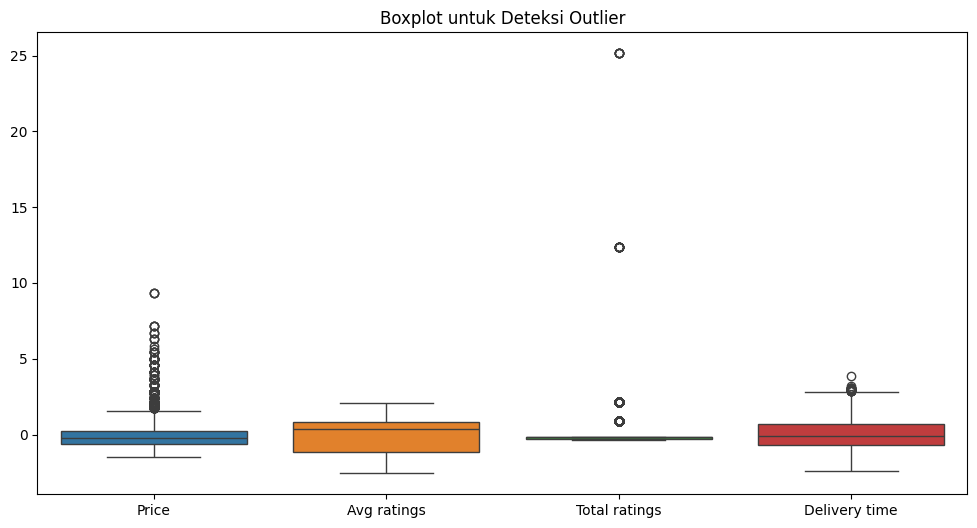

In [147]:
# Menggunakan boxplot untuk melihat outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

Karena outlier memang bagian dari dataset (harga makanan bisa sangat mahal atau sangat murah) ➝ biarkan saja

## Encoding Data Kategorikal

In [148]:
categorical_columns = ["City", "Area", "Food type", "Restaurant","Address"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Konversi ke angka
    label_encoders[col] = le  # Simpan encoder untuk inversi jika dibutuhkan nanti

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [149]:
print(df.dtypes)

Area               int64
City               int64
Restaurant         int64
Price            float64
Avg ratings      float64
Total ratings    float64
Food type          int64
Address            int64
Delivery time    float64
dtype: object


In [150]:
# Menentukan jumlah cluster optimal menggunakan metode Elbow
inertia = []
K_range = range(1, 11)  # Mencoba jumlah cluster dari 1 sampai 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

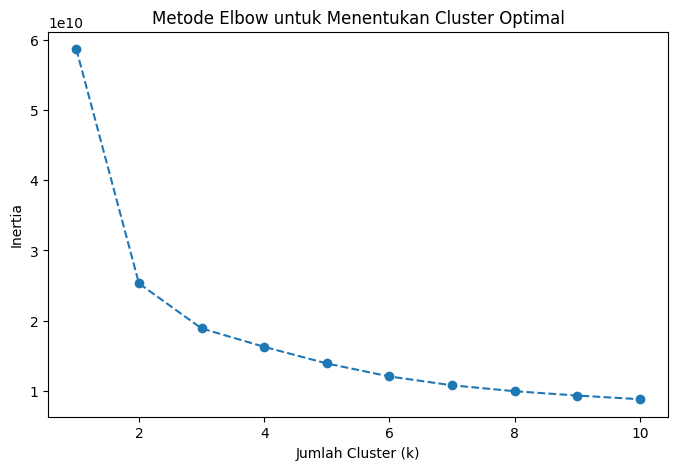

In [151]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.show()

Akan digunakan k=2, karena k setelah 2 itu landai, terlihat pada grafik

In [152]:
# Digunakan K-Means untuk Clustering
# Menjalankan K-Means dengan jumlah cluster optimal k=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [153]:
# Hitung Silhouette Score
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score untuk {optimal_k} cluster: {silhouette_avg}")

Silhouette Score untuk 2 cluster: 0.45283328084260527


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [154]:
df_selection = df.drop(columns=["Area","Restaurant","Address"])

### Mengapa Kolom *Area*, *Restaurant*, dan *Address* dihapus?
Berikut alasan mengapa saya hapus.<br>
Mari kita lihat satu-satu apakah semua layak dipakai untuk clustering:

| Kolom           | Tipe         | Perlu?   | Alasan                                                                 |
|------------------|--------------|----------|------------------------------------------------------------------------|
| **Area**         | Categorical  | ✅ Ya     | Bisa mewakili wilayah geografis/restoran lokal                         |
| **City**         | Categorical  | ✅ Ya     | Tapi mirip dengan Area, jadi bisa redundant                           |
| **Restaurant**   | Categorical  | ❌ Tidak  | Terlalu spesifik & high cardinality (banyak label unik, bisa ratusan) |
| **Price**        | Numeric      | ✅ Ya     | Variabel penting                                                      |
| **Avg ratings**  | Numeric      | ✅ Ya     | Masuk akal digunakan                                                  |
| **Total ratings**| Numeric      | ✅ Ya     | Masih bisa digunakan                                                  |
| **Food type**    | Categorical  | ✅ Ya     | Kategori makanan cukup relevan                                        |
| **Address**      | Categorical  | ❌ Tidak  | Mirip Restaurant, terlalu spesifik & noise                            |
| **Delivery time**| Numeric      | ✅ Ya     | Masuk akal dimasukkan                                                 |

---

### Seleksi Fitur

#### Fitur Numerik:
- `Price`
- `Avg ratings`
- `Total ratings`
- `Delivery time`

#### Fitur Kategorikal:
- `Area`
- `City` *(pilih salah satu dari Area atau City, jangan dua-duanya karena cukup mirip, saya memilih City)*
- `Food type`

#### Singkirkan:
- `Restaurant`, `Address`  
*(karena high cardinality, noise, dan sangat spesifik)*




In [155]:
inertia = []
K_range_selection = range(1, 11)  # Mencoba jumlah cluster dari 1 sampai 10

for k in K_range_selection:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selection)
    inertia.append(kmeans.inertia_)

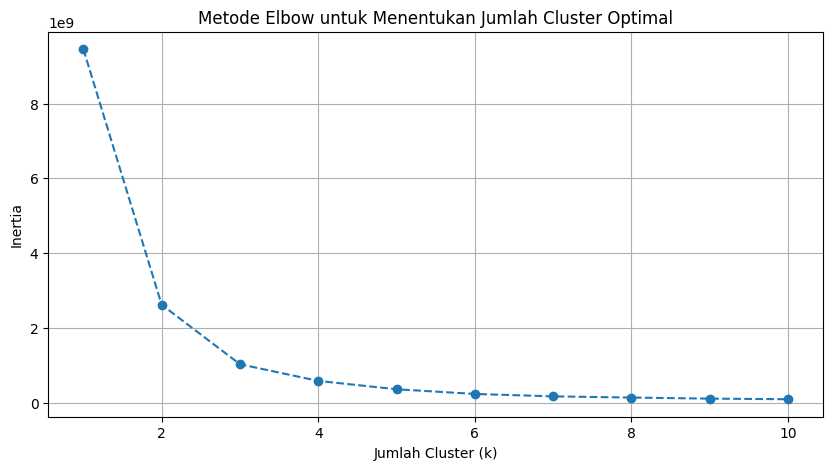

In [156]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range_selection, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()

In [157]:
# Latih K-Means dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_selection)
clusters = kmeans.predict(df_selection)

# Hitung Silhouette Score untuk menilai kualitas cluster
silhouette_avg = silhouette_score(df_selection, clusters)
print(f"Silhouette Score untuk 3 cluster: {silhouette_avg:.4f}")

Silhouette Score untuk 3 cluster: 0.6152


### Perbandingan Performa Model Sebelum dan Sesudah Feature Selection

Dalam proses clustering, dilakukan evaluasi menggunakan **Silhouette Score** untuk menilai kualitas pemisahan antar cluster. Berikut adalah hasil perbandingan sebelum dan sesudah melakukan seleksi fitur:

| Tahap                      | Jumlah Cluster | Silhouette Score | Keterangan                                        |
|----------------------------|----------------|------------------|---------------------------------------------------|
| 🔹 **Sebelum Feature Selection** | 2              | 0.4528           | Menggunakan semua kolom tanpa seleksi fitur       |
| 🔸 **Sesudah Feature Selection** | 3              | 0.6152           | Menggunakan hanya kolom relevan (6 fitur utama)   |

### Kesimpulan:
- Setelah dilakukan **feature selection**, hasil clustering menunjukkan **peningkatan kualitas** dengan Silhouette Score yang jauh lebih baik.
- Hal ini menunjukkan bahwa **penghilangan fitur yang tidak relevan/noisy** mampu meningkatkan **pemisahan antar cluster** secara signifikan.

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

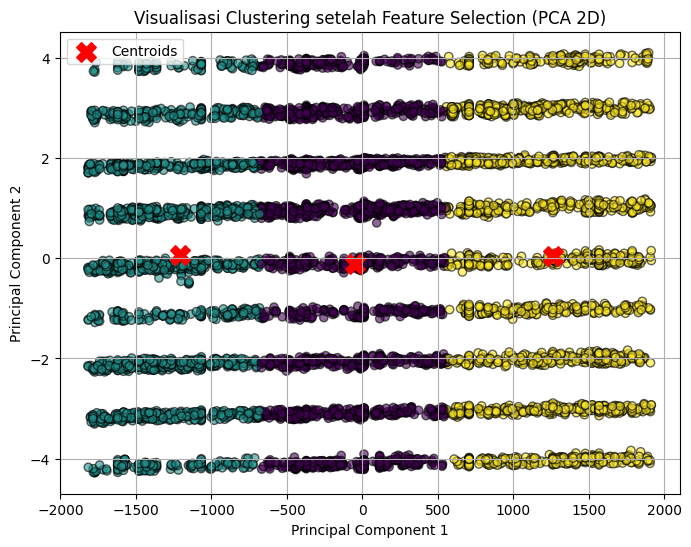

In [158]:
# Lakukan PCA hanya untuk visualisasi (mengurangi ke 2D)
pca_vis = PCA(n_components=2)
df_vis = pca_vis.fit_transform(df_selection)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_vis[:, 0], df_vis[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='k')

# Hitung ulang centroid di ruang 2D PCA
centroids_2d = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Clustering setelah Feature Selection (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [159]:
# Menambahkan Label Cluster ke DataFrame
df_clustered = df_selection.copy()  # Salin dataset asli
df_clustered['Cluster'] = clusters  # Tambahkan label cluster

In [160]:
# Mengembalikan Data Kategorikal ke Bentuk Asli
categorical_columns_inv = ["City", "Food type"]

for col in categorical_columns_inv:
    if col in label_encoders:
        df_clustered[col] = df_clustered[col].astype(int)  # Pastikan int
        df_clustered[col] = label_encoders[col].inverse_transform(df_clustered[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [161]:
df_clustered[numerical_columns] = scaler.inverse_transform(df_clustered[numerical_columns])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [162]:
# Hitung jumlah data per cluster
cluster_counts = df_clustered['Cluster'].value_counts()
print("Jumlah data per cluster:\n", cluster_counts)

Jumlah data per cluster:
 Cluster
0    3151
2    2947
1    2582
Name: count, dtype: int64


In [163]:
# Analisis Karakteristik Tiap Cluster
for cluster in sorted(df_clustered['Cluster'].unique()):
    print(f"\n--- Cluster {cluster} ---")
    print(df_clustered[df_clustered['Cluster'] == cluster].describe())


--- Cluster 0 ---
             Price  Avg ratings  Total ratings  Delivery time  Cluster
count  3151.000000  3151.000000    3151.000000    3151.000000   3151.0
mean    349.157728     3.641288     121.148842      53.781657      0.0
std     240.584495     0.672649     258.858202      14.442791      0.0
min       0.000000     2.200000      20.000000      20.000000      0.0
25%     200.000000     2.900000      50.000000      44.000000      0.0
50%     300.000000     3.800000      80.000000      52.000000      0.0
75%     400.000000     4.300000     100.000000      63.500000      0.0
max    2500.000000     5.000000    5000.000000     109.000000      0.0

--- Cluster 1 ---
             Price  Avg ratings  Total ratings  Delivery time  Cluster
count  2582.000000  2582.000000    2582.000000    2582.000000   2582.0
mean    345.454299     3.582959     176.754454      55.472889      1.0
std     216.031028     0.640875     573.813079      14.472162      0.0
min       1.000000     2.000000      20

In [164]:
# Analisis Karakteristik Tiap Cluster | kategorikal
for col in categorical_columns_inv:
    print(f"\nDistribusi {col} per cluster:")
    print(df_clustered.groupby('Cluster')[col].value_counts())


Distribusi City per cluster:
Cluster  City     
0        Kolkata      540
         Mumbai       500
         Pune         377
         Chennai      355
         Hyderabad    330
         Ahmedabad    319
         Bangalore    310
         Surat        218
         Delhi        202
1        Kolkata      469
         Mumbai       398
         Chennai      390
         Hyderabad    357
         Bangalore    298
         Pune         278
         Delhi        164
         Ahmedabad    133
         Surat         95
2        Pune         435
         Hyderabad    388
         Mumbai       379
         Chennai      361
         Bangalore    338
         Kolkata      337
         Ahmedabad    265
         Delhi        245
         Surat        199
Name: count, dtype: int64

Distribusi Food type per cluster:
Cluster  Food type                                            
0        Indian                                                   389
         Fast Food                                     

In [167]:
for cluster in sorted(df_clustered['Cluster'].unique()):
    print(f"\nTop 10 Food type untuk Cluster {cluster}")
    print(df_clustered[df_clustered['Cluster'] == cluster]['Food type'].value_counts().head(10))


Top 10 Food type untuk Cluster 0
Food type
Indian                 389
Fast Food              240
Desserts               106
Indian,Chinese         106
Ice Cream               69
Ice Cream,Desserts      65
Continental             38
Desserts,Bakery         38
Fast Food,Beverages     35
Desserts,Ice Cream      33
Name: count, dtype: int64

Top 10 Food type untuk Cluster 1
Food type
Chinese                 277
Bakery                   90
Beverages                82
Biryani                  79
Bakery,Desserts          59
Chinese,Indian           57
Beverages,Desserts       38
Chinese,Fast Food        38
Chinese,North Indian     36
Bengali                  26
Name: count, dtype: int64

Top 10 Food type untuk Cluster 2
Food type
North Indian            246
South Indian            228
North Indian,Chinese     99
Pizzas                   77
Snacks                   58
Sweets                   35
Pizzas,Fast Food         24
South Indian,Chinese     20
Maharashtrian            20
Sweets,Snacks 

In [168]:
# nilai dominan pada categorical_columns
df_clustered.groupby('Cluster')[categorical_columns_inv].agg(lambda x: x.mode()[0])

,City,Food type
Cluster,,
0,Kolkata,Indian
1,Kolkata,Chinese
2,Pune,North Indian


# Analisis Karakteristik Cluster dari Model KMeans
Model KMeans dengan jumlah cluster = 3 menghasilkan pengelompokan restoran yang tampaknya didasarkan pada **jenis makanan yang disajikan**, karena distribusi fitur numeriknya tidak menunjukkan perbedaan signifikan. Berikut adalah karakteristik dari tiap cluster:

---

## **Cluster 0**:
- **Harga rata-rata (Price)**: 349.16  
- **Rating rata-rata (Avg ratings)**: 3.64  
- **Jumlah ratings rata-rata (Total ratings)**: 121.15  
- **Waktu pengiriman rata-rata (Delivery time)**: 53.78 menit  
- **Distribusi Kota (Top 3)**:
  - Kolkata
  - Mumbai
  - Pune
- **Jenis makanan populer (Top 5)**:
  - Indian  
  - Fast Food  
  - Desserts  
  - Indian,Chinese  
  - Ice Cream  

### Analisis:
Cluster ini didominasi oleh restoran yang menyajikan makanan **khas India dan Fast Food**. Rentang harga dan ratingnya cukup standar, tetapi jumlah rating cenderung lebih kecil dibandingkan cluster lainnya — kemungkinan restoran pada cluster ini adalah **restoran lokal atau baru berkembang**. Kota seperti **Kolkata dan Mumbai** mendominasi distribusi geografisnya.

---

## **Cluster 1**:
- **Harga rata-rata (Price)**: 345.45  
- **Rating rata-rata (Avg ratings)**: 3.58  
- **Jumlah ratings rata-rata (Total ratings)**: 176.75  
- **Waktu pengiriman rata-rata (Delivery time)**: 55.47 menit  
- **Distribusi Kota (Top 3)**:
  - Kolkata
  - Mumbai
  - Chennai
- **Jenis makanan populer (Top 5)**:
  - Chinese  
  - Bakery  
  - Beverages  
  - Biryani  
  - Bakery,Desserts  

### Analisis:
Cluster ini memiliki restoran dengan kombinasi makanan yang lebih **berorientasi pada kuliner Chinese dan Bakery/Beverages**. Meskipun rating sedikit lebih rendah dari yang lain, jumlah ratingnya tinggi—menunjukkan **trafik pelanggan yang besar**. Cocok dikategorikan sebagai **restoran populer dengan konsep modern/multikultural**.

---

## **Cluster 2**

- **Harga rata-rata (Price)**: 350.30  
- **Rating rata-rata (Avg ratings)**: 3.73  
- **Jumlah ratings rata-rata (Total ratings)**: 176.95  
- **Waktu pengiriman rata-rata (Delivery time)**: 52.85 menit  
- **Distribusi Kota (Top 3)**:
  - Pune
  - Hyderabad
  - Mumbai
- **Jenis makanan populer (Top 5)**:
  - North Indian  
  - South Indian  
  - North Indian,Chinese  
  - Pizzas  
  - Snacks  

### Analisis:
Cluster ini menampilkan restoran dengan fokus pada **masakan daerah India (North/South)** serta makanan ringan dan cepat saji seperti **Pizza dan Snacks**. Dengan rating yang **paling tinggi** dan waktu pengiriman **paling cepat**, restoran di cluster ini mungkin adalah **favorit pelanggan yang mengutamakan kualitas dan efisiensi layanan**.

---

## Insight Keseluruhan

Meskipun perbedaan numerik antar cluster tidak terlalu besar, **perbedaan jenis makanan sangat mencolok**, yang menandakan bahwa fitur `Food type` (meskipun dikodekan secara numerik) memainkan peran besar dalam proses clustering.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [169]:
# Simpan file CSV ke storage sementara Colab
df_clustered.to_csv("hasil_clustering.csv", index=False)
print("File CSV berhasil disimpan!")

# Unduh file ke komputer lokal
from google.colab import files
files.download("hasil_clustering.csv")

File CSV berhasil disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>